In [2]:
import sys
import warnings
import datacube
from datacube.storage import masking
from datacube.helpers import ga_pq_fuser
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os

sys.path.append('../10_Scripts')
import SpatialTools
import gdal
import DEADataHandling
import DEAPlotting

In [9]:
# #2010s snow
snow_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2016_2018_snow.tif')
snow_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2014_2015_snow.tif')
snow_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2012_2013_snow.tif')
snow_sum11 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2010_2011_snow.tif')

snow_sum10s=snow_sum11+snow_sum12+snow_sum14+snow_sum16

# #2010s valid
valid_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2016_2018_valid.tif')
valid_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2014_2015_valid.tif')
valid_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2012_2013_valid.tif')
valid_sum11 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2010_2011_valid.tif')

valid_sum10s=valid_sum11+valid_sum12+valid_sum14+valid_sum16

In [7]:
# #2000s snow
snow_sum09 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2008_2009_snow.tif')
snow_sum07 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2006_2007_snow.tif')
snow_sum05 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2004_2005_snow.tif')
snow_sum03 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2002_2003_snow.tif')
snow_sum01 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2000_2001_snow.tif')
snow_sum00s=snow_sum01+snow_sum03+snow_sum05+snow_sum07+snow_sum09

# #2000s valid
valid_sum09 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2008_2009_valid.tif')
valid_sum07 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2006_2007_valid.tif')
valid_sum05 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2004_2005_valid.tif')
valid_sum03 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2002_2003_valid.tif')
valid_sum01 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2000_2001_valid.tif')
valid_sum00s=valid_sum01+valid_sum03+valid_sum05+valid_sum07+valid_sum09

In [5]:
# #2000s snow
snow_sum99 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2008_2009_snow.tif')
snow_sum97 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2006_2007_snow.tif')
snow_sum95 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2004_2005_snow.tif')
snow_sum93 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2002_2003_snow.tif')
snow_sum91 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/2000_2001_snow.tif')
snow_sum90s=snow_sum91+snow_sum93+snow_sum95+snow_sum97+snow_sum99

# #2000s valid
valid_sum99 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1998_1999_valid.tif')
valid_sum97 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1996_1997_valid.tif')
valid_sum95 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1994_1995_valid.tif')
valid_sum93 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1992_1993_valid.tif')
valid_sum91 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1990_1991_valid.tif')
valid_sum90s=valid_sum91+valid_sum93+valid_sum95+valid_sum97+valid_sum99

snow_sum80s = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1987_1989_snow.tif')
valid_sum80s = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/Tas/decadal/red/cm/1987_1989_valid.tif')

In [10]:
snow_all = snow_sum10s+snow_sum00s+snow_sum90s+snow_sum80s
valid_all = valid_sum10s+valid_sum00s+valid_sum90s+valid_sum80s
snow_all_prop = snow_all/valid_all

In [11]:
# time=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/nofimages.txt', header=None)
# time.columns=['year', 'count']
# time=time.set_index('year')
# time

In [12]:
# valid_time10s=time.loc['2016_2018_']+time.loc['2013_2015_']+time.loc['2010_2012_']
# valid_time00s=time.loc['2007_2009_']+time.loc['2004_2006_']+time.loc['2000_2003_']
# valid_time90s=time.loc['1997_1999_']+time.loc['1994_1996_']+time.loc['1990_1993_']
# valid_time80s=time.loc['1987_1989_']


In [13]:
# valid_time_all = time['count'].sum()

In [15]:
# valid_time_all

In [14]:
# valid_prop10s = valid_sum10s / int(valid_time10s)
# valid_prop00s = valid_sum00s / int(valid_time00s)
# valid_prop90s = valid_sum90s / int(valid_time90s)
# valid_prop80s = valid_sum80s / int(valid_time80s)
# valid_prop_all = valid_all / valid_time_all

# valid_prop10s

In [23]:
# valid_prop_all.plot()

In [16]:
snow_prop10s = snow_sum10s/valid_sum10s
snow_prop00s = snow_sum00s/valid_sum00s
snow_prop90s = snow_sum90s/valid_sum90s
snow_prop80s = snow_sum80s/valid_sum80s

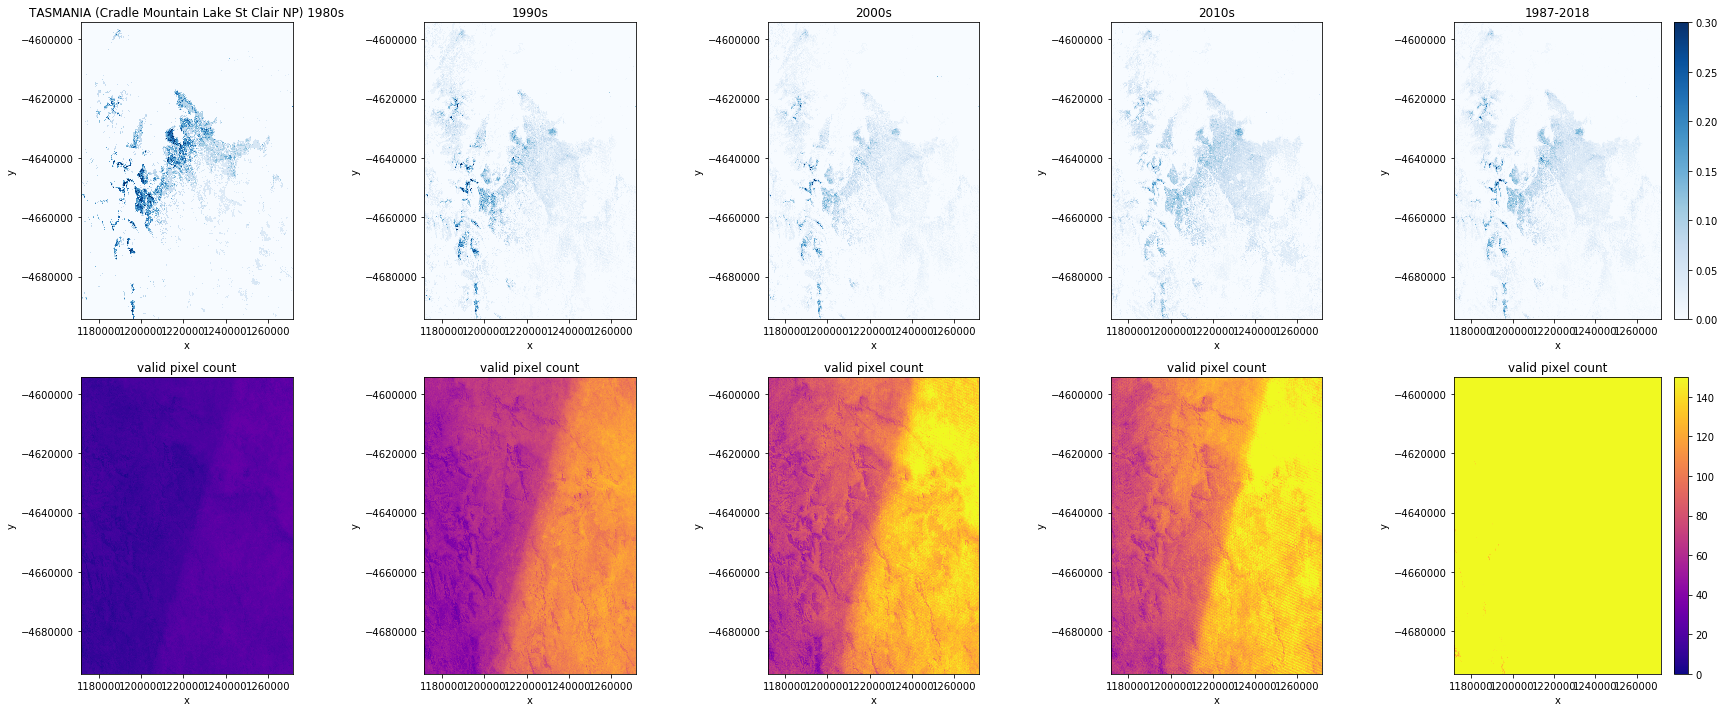

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=5, nrows=2,
                         figsize = (24, 10),
                         gridspec_kw={'width_ratios': [9, 9, 9, 9, 11]})

d=snow_prop80s.plot(ax=axes[0,0], cmap='Blues',add_colorbar=False)
dv=valid_sum80s.plot(cmap='plasma',ax=axes[1,0],add_colorbar=False)
c=snow_prop90s.plot(ax=axes[0,1], cmap='Blues', add_colorbar=False)
cv=valid_sum90s.plot(cmap='plasma',ax=axes[1,1], add_colorbar=False)
b=snow_prop00s.plot(ax=axes[0,2], cmap='Blues', add_colorbar=False)
bv=valid_sum00s.plot(cmap='plasma',ax=axes[1,2], add_colorbar=False)
a=snow_prop10s.plot(ax=axes[0,3], cmap='Blues', add_colorbar=False)
av=valid_sum10s.plot(cmap='plasma',ax=axes[1,3], add_colorbar=False)
z=snow_all_prop.plot(ax=axes[0,4], cmap='Blues')
zv=valid_all.plot(cmap='plasma',ax=axes[1,4])

axes[0,0].set_title('TASMANIA (Cradle Mountain Lake St Clair NP) 1980s')
axes[0,1].set_title('1990s')
axes[0,2].set_title('2000s')
axes[0,3].set_title('2010s')
axes[0,4].set_title('1987-2018')

axes[1,0].set_title('valid pixel count')
axes[1,1].set_title('valid pixel count')
axes[1,2].set_title('valid pixel count')
axes[1,3].set_title('valid pixel count')
axes[1,4].set_title('valid pixel count')
z.set_clim(0,0.3)
zv.set_clim(0, 150)
a.set_clim(0,0.3)
av.set_clim(0, 150)
b.set_clim(0,0.3)
bv.set_clim(0, 150)
c.set_clim(0,0.3)
cv.set_clim(0, 150)
d.set_clim(0,0.3)
dv.set_clim(0, 150)
plt.tight_layout()
plt.savefig('decade_tas_cm1.png')

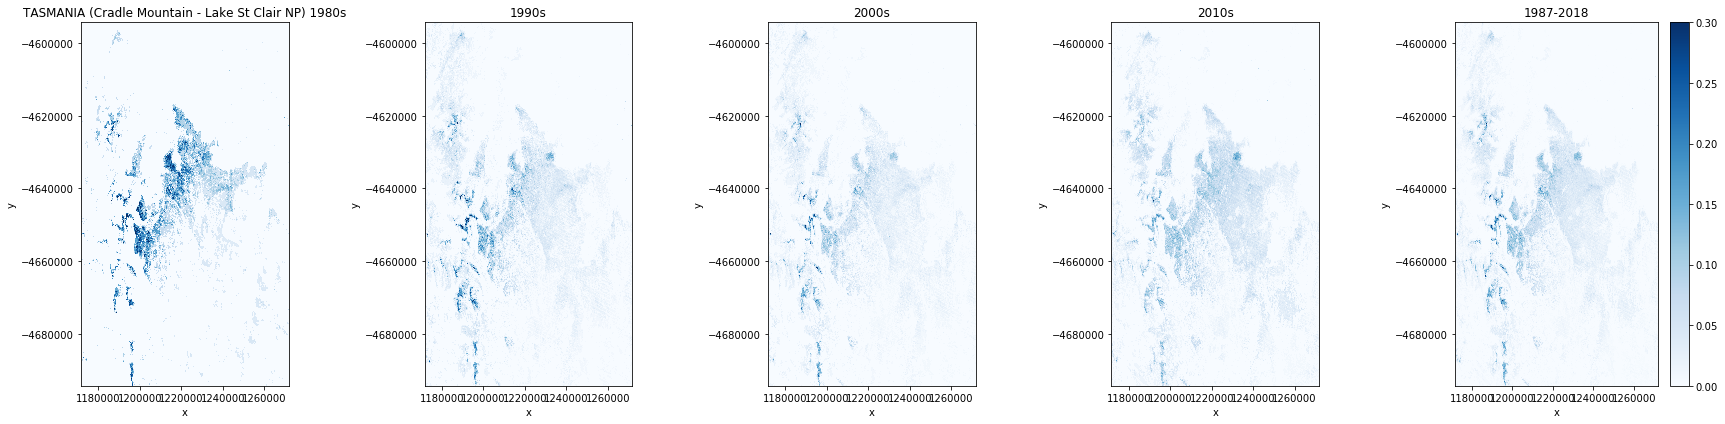

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=5,
                         figsize = (24, 6),
                         gridspec_kw={'width_ratios': [9, 9, 9, 9, 11]})

d=snow_prop80s.plot(ax=axes[0], cmap='Blues',add_colorbar=False)
# dv=valid_sum80s.plot(cmap='Reds',ax=axes[1,0],add_colorbar=False)
c=snow_prop90s.plot(ax=axes[1], cmap='Blues', add_colorbar=False)
# cv=valid_sum90s.plot(cmap='Reds',ax=axes[1,1], add_colorbar=False)
b=snow_prop00s.plot(ax=axes[2], cmap='Blues', add_colorbar=False)
# bv=valid_sum00s.plot(cmap='Reds',ax=axes[1,2], add_colorbar=False)
a=snow_prop10s.plot(ax=axes[3], cmap='Blues', add_colorbar=False)
# av=valid_sum10s.plot(cmap='Reds',ax=axes[1,3], add_colorbar=False)
z=snow_all_prop.plot(ax=axes[4], cmap='Blues')
# zv=valid_all.plot(cmap='Reds',ax=axes[1,4])

axes[0].set_title('TASMANIA (Cradle Mountain - Lake St Clair NP) 1980s')
axes[1].set_title('1990s')
axes[2].set_title('2000s')
axes[3].set_title('2010s')
axes[4].set_title('1987-2018')

# axes[1,0].set_title('valid pixel count')
# axes[1,1].set_title('valid pixel count')
# axes[1,2].set_title('valid pixel count')
# axes[1,3].set_title('valid pixel count')
# axes[1,4].set_title('valid pixel count')
z.set_clim(0,0.3)
# zv.set_clim(0, 200)
a.set_clim(0,0.3)
# av.set_clim(0, 200)
b.set_clim(0,0.3)
# bv.set_clim(0, 200)
c.set_clim(0,0.3)
# cv.set_clim(0, 200)
d.set_clim(0,0.3)
# dv.set_clim(0, 200)
plt.tight_layout()
plt.savefig('decade_cm_tas_snow.png')

In [34]:
snow_sum10s=snow_sum12+snow_sum14+snow_sum16

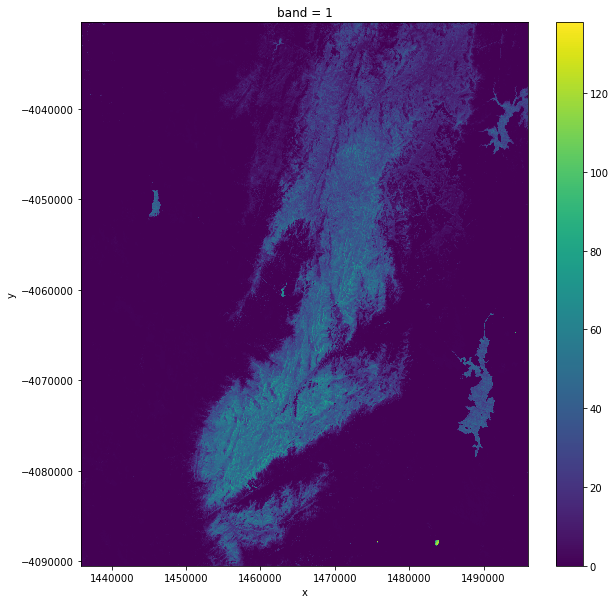

In [37]:
snow_sum10s.plot(figsize=(10, 10))

In [13]:
#2010s valid
valid_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/decadalvalid.tif')
valid_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2013_2015_valid.tif')
valid_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2010_2012_valid.tif')

In [14]:
valid_sum10s=valid_sum12+valid_sum14+valid_sum16

In [15]:
snow_prop10s = snow_sum10s/valid_sum10s

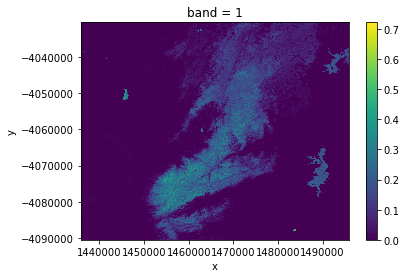

In [17]:
snow_prop10s.plot()

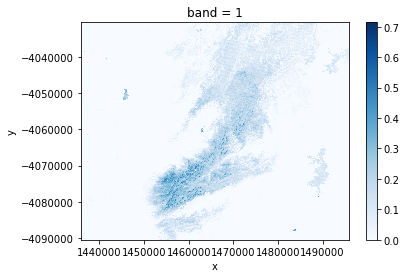

In [4]:
snow_prop.plot(cmap='Blues')

TypeError: 'Text' object is not callable

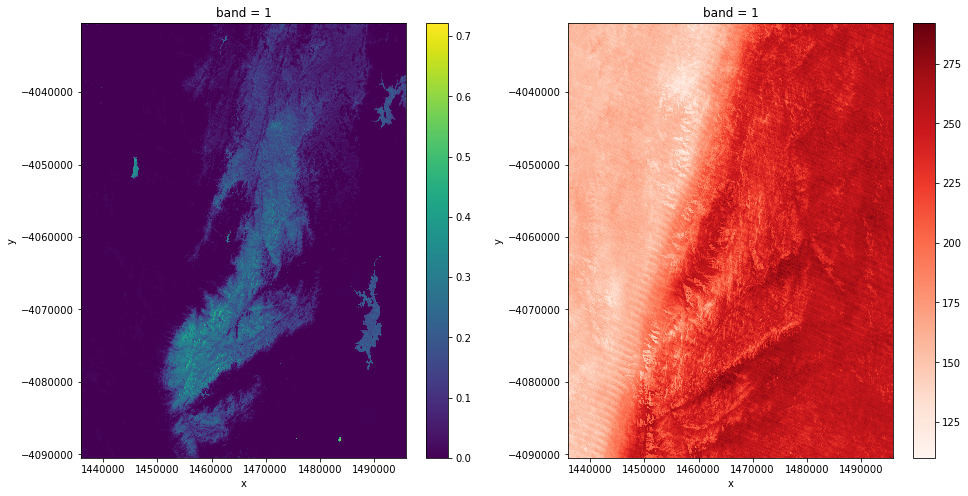

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, 
                         figsize = (16, 8)
                        )

snow_prop10s.plot(ax=axes[0])
valid_sum10s.plot(cmap='Reds',ax=axes[1])
# axes[0].title('snow')

In [ ]:
plt.savefig('decade_example.png')